## Importing Libraries and Modules:
With combined dataset

In [8]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data Loading and Preprocessing:



In [10]:
# Import the functions from data_loading.py
# Add the 'scripts' directory to the system path
scripts_dir = os.path.abspath(os.path.join('..', 'scripts'))
sys.path.append(scripts_dir)

# Print contents of the 'scripts' directory to verify the presence of data_loading.py
print("Contents of scripts directory:", os.listdir(scripts_dir))
try:
    from data_loading import load_images_from_folder, preprocess_data, split_data
except ImportError as e:
    print("Error importing from data_loading.py:", e)

# Define the dataset folder path relative to the notebook location
dataset_folder = '../dataset'

# Load images
images, labels = load_images_from_folder(dataset_folder)

# Preprocess data
images, labels = preprocess_data(images, labels)



Contents of scripts directory: ['data_loading.py', '__pycache__', '.ipynb_checkpoints']


## Data Balancing:
Apply undersampling to balance the dataset using RandomUnderSampler.
Flatten the images for compatibility with the KNN algorithm.
Resample the images and labels to create a balanced dataset.


In [13]:

# Apply undersampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
images_flat = images.reshape(len(images), -1)  # Flatten the images for KNN
images_resampled, labels_resampled = rus.fit_resample(images_flat, labels)

# Split the balanced data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_resampled, labels_resampled, test_size=0.2, stratify=labels_resampled, random_state=42)

# Example to verify data shapes
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Validation data shape: {X_val.shape}, Validation labels shape: {y_val.shape}')


Training data shape: (2492, 150528), Training labels shape: (2492,)
Validation data shape: (624, 150528), Validation labels shape: (624,)


## sample training and validation images

Sample Training Images:


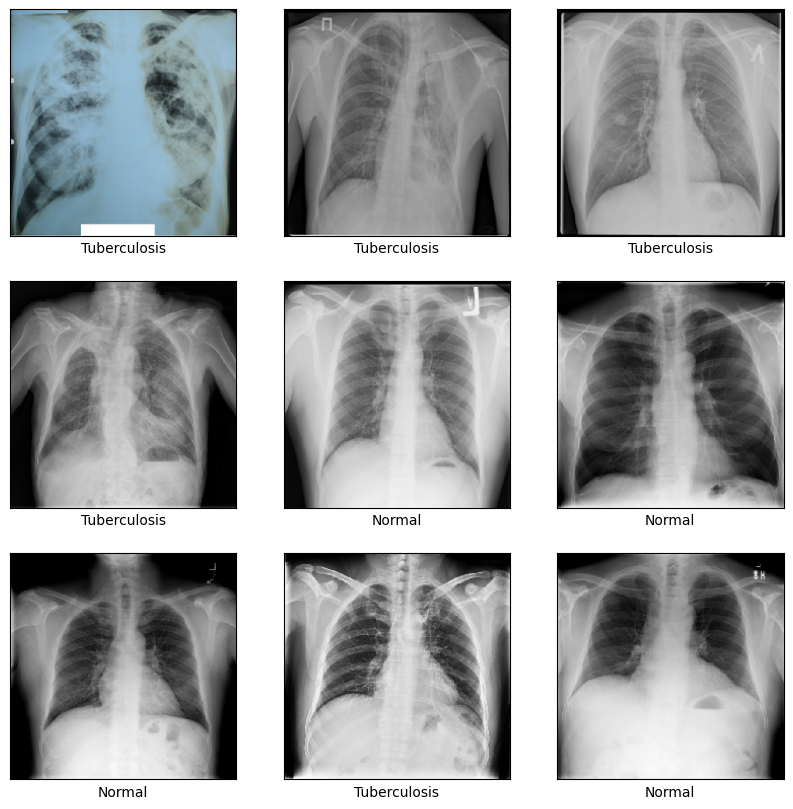

Sample Validation Images:


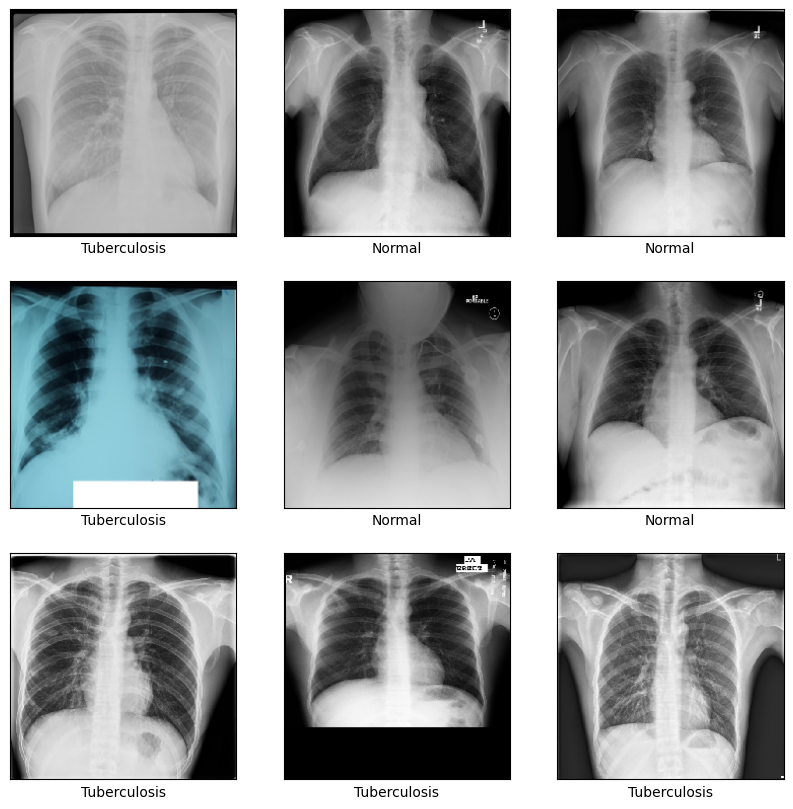

In [19]:

# Function to plot images (reshaping for visualization)
def plot_images(images, labels, num_images=9):
    images = images.reshape(len(images), 224, 224, 3)  # Reshape back for visualization
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel('Tuberculosis' if labels[i] == 1 else 'Normal')
    plt.show()

# Plot sample training images
print("Sample Training Images:")
plot_images(X_train, y_train)

# Plot sample validation images
print("Sample Validation Images:")
plot_images(X_val, y_val)


## Plotting function for dataset distribution


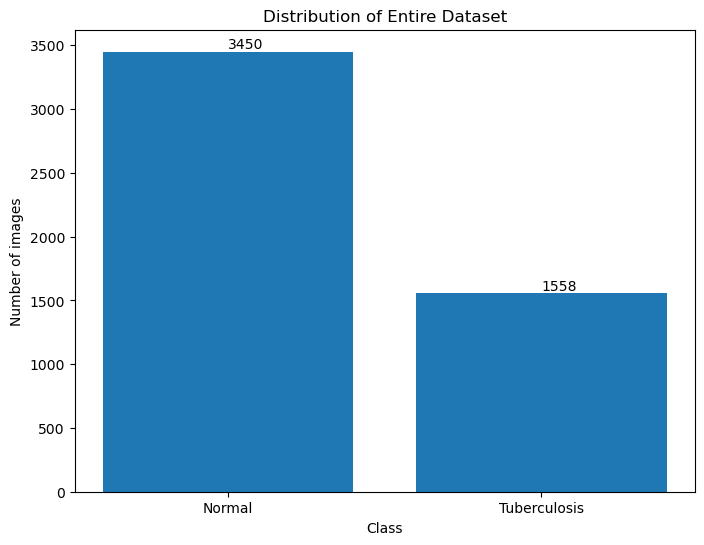

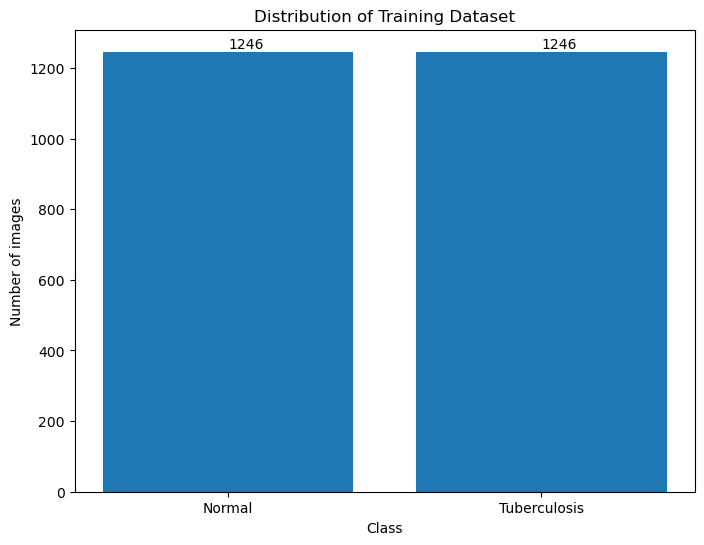

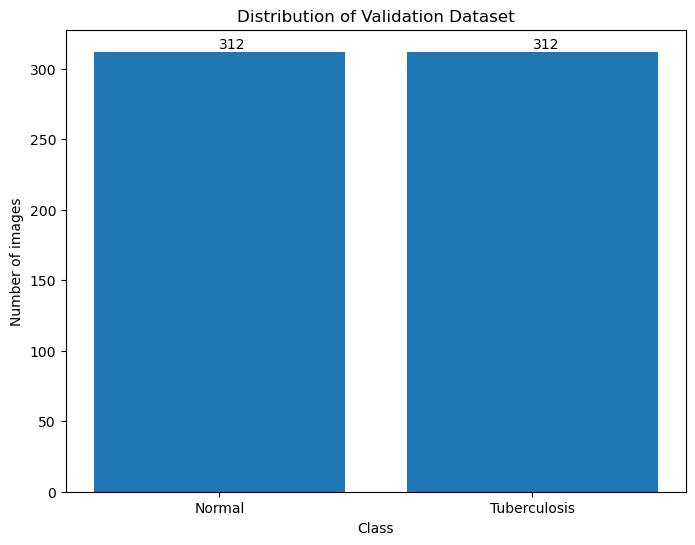

In [43]:
def plot_dataset_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(8, 6))
    bars = plt.bar(unique, counts, tick_label=['Normal', 'Tuberculosis'])
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.title(title)

    # Annotate bars with counts
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

    plt.show()

# Plot distribution of the entire dataset
plot_dataset_distribution(labels, 'Distribution of Entire Dataset')

# Plot distribution of the training dataset
plot_dataset_distribution(y_train, 'Distribution of Training Dataset')

# Plot distribution of the validation dataset
plot_dataset_distribution(y_val, 'Distribution of Validation Dataset')


## Creating and training KNN classifier


In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on validation set
y_pred = knn.predict(X_val)

# Evaluate the classifier
print("Classification Report:\n", classification_report(y_val, y_pred))

print("Accuracy Score:\n", accuracy_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       312
           1       0.94      0.87      0.90       312

    accuracy                           0.90       624
   macro avg       0.91      0.90      0.90       624
weighted avg       0.91      0.90      0.90       624

Accuracy Score:
 0.9038461538461539


## Confusion Matrix


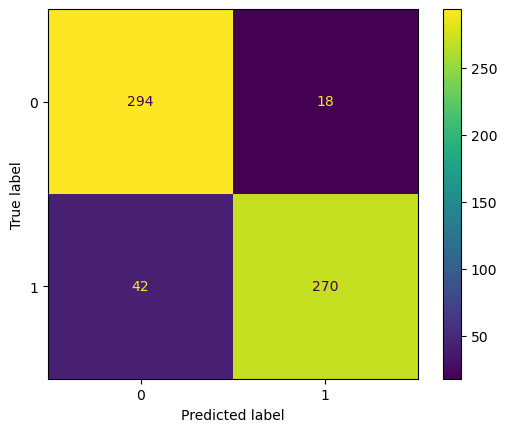

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.show()

## AUC-ROC

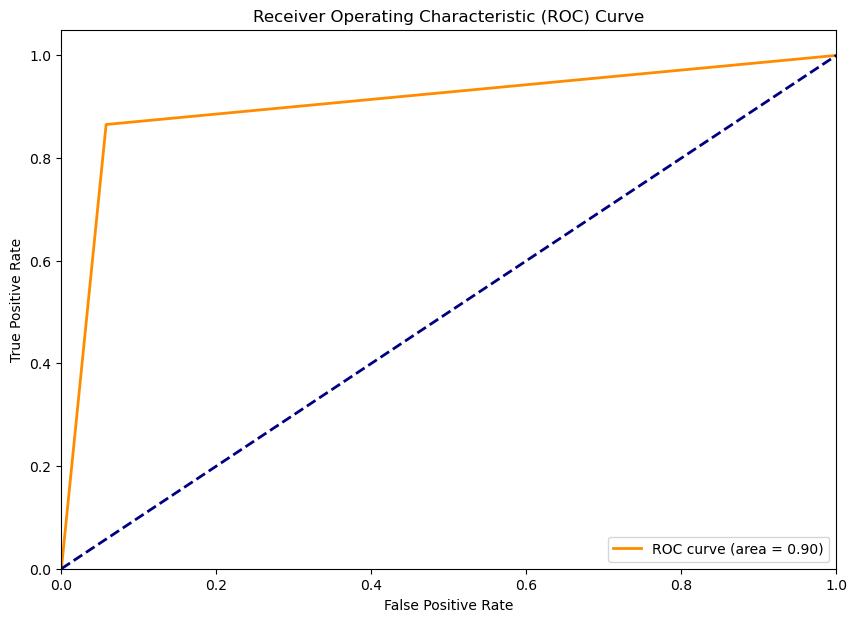

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y_val,y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [33]:
len(os.listdir('../dataset/Normal'))


3451

In [35]:
len(os.listdir('../dataset/Tuberculosis'))

1559